<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap1_IntrodTimeSeries_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns

from sympy import *

$$ Y_t = T_t + S_t + R_t $$
$$ $$
$$ \bf Y = B \beta + A \alpha + r $$

$$ |Y_t| = n $$ 
$$ T_t = \sum_{j=0}^m \beta t^j $$
$$ S_t = \sum_{j=1}^n \alpha_j D_j t $$

,t,Y,T,S,R,I
2018-01-31,0,4.52,1,2.53,0.99,0.0
2018-02-28,1,4.87,3,2.93,-1.07,0.0
2018-03-31,2,5.57,5,1.93,-1.36,0.0
2018-04-30,3,7.79,7,0.53,0.26,0.0
2018-05-31,4,7.43,9,-2.67,1.10,0.0


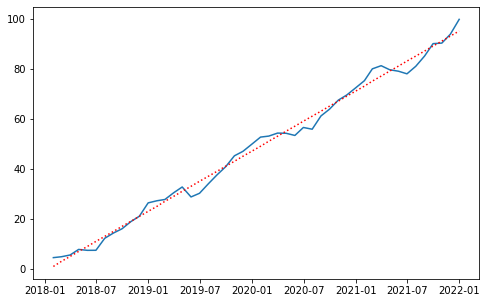

In [3]:
def ts_generate(start = '1/1/2018', 
                end = '1/2/2022',
                freq = 'M',
                seed = 123,
                beta = np.array([1 , 2]),
                alpha = np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3]), 
                r_scale = 5,
                I_scale = 0, # was 5
                additive = True,
                verbose = False):

  np.random.seed(seed)

  index_dates = pd.date_range(start=start, end=end, freq=freq)
  t = np.arange(0,len(index_dates),1)
  n = len(t)

  m = len(beta)

  B = ( t**0 ).reshape([len(t),1])
  for i in range(1,m):
    B = np.append(B,( t**i ).reshape(len(t),1), axis=1 )
 
  alpha = alpha - np.abs( alpha.mean() )

  period = len(alpha)
  A = np.zeros([n,period])

  for i in range(n):
    A[i,i%period] = 1

  r = np.random.rand(n).T * r_scale
  r = r - np.abs( r.mean() )

  T = B @ beta
  S = A @ alpha
  R = r
  I = np.ones(n).T  * I_scale

  if additive:
    Y = T + S + R + I
  else:
    Y = T * S * R * I

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'], df['I'] = t, Y, T, S, R, I  

  if verbose:
    # np.set_printoptions(precision=2)
    pd.set_option('display.precision', 2)

    display( df.head() )

    # np.set_printoptions(precision=8)
    pd.set_option('display.precision', 6)

  return df

df = ts_generate(verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I , 'r:' )
plt.show()


In [4]:
Ys = latex( Matrix(np.round(df.Y.head(),2)) )
latex(Ys)

from IPython.display import display, Latex
Latex(Ys)

<IPython.core.display.Latex object>

,t,Y,T,S,R,I
2018-01-31,0,9.59,1,7.6,0.99,0.0
2018-02-28,1,10.73,3,8.8,-1.07,0.0
2018-03-31,2,9.44,5,5.8,-1.36,0.0
2018-04-30,3,8.86,7,1.6,0.26,0.0
2018-05-31,4,2.10,9,-8.0,1.10,0.0


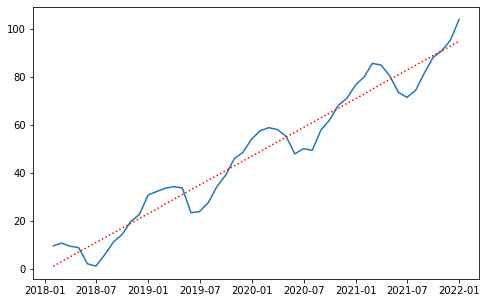

In [5]:
df = ts_generate(beta=np.array([1, 2]), alpha=np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])*3,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I, 'r:' )
plt.show()

,t,Y,T,S,R,I
2018-01-31,0,10.18,1,-0.69,9.86,0.0
2018-02-28,1,9.49,4,16.14,-10.65,0.0
2018-03-31,2,10.88,7,17.50,-13.62,0.0
2018-04-30,3,14.74,10,2.14,2.61,0.0
2018-05-31,4,8.19,13,-15.82,11.01,0.0


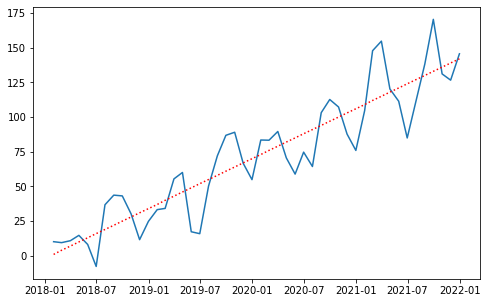

,t,Y,T,S,R,I
count,48.00,48.000000,48.00,4.800000e+01,4.800000e+01,48.0
mean,23.50,71.500000,71.50,-2.960595e-16,-1.184238e-15,0.0
std,14.00,45.343060,42.00,1.427668e+01,1.196013e+01,0.0
min,0.00,-7.667361,1.00,-2.068513e+01,-2.197497e+01,0.0
25%,11.75,33.947940,36.25,-1.262966e+01,-8.881841e+00,0.0
50%,23.50,71.339138,71.50,7.258698e-01,-1.971265e+00,0.0
75%,35.25,105.325631,106.75,1.337682e+01,9.428112e+00,0.0
max,47.00,170.458424,142.00,1.910183e+01,2.431912e+01,0.0


In [6]:
df = ts_generate(beta=np.array([1, 3]), alpha=np.sin( np.arange(0,12) )*20,r_scale=50,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I, 'r:' )
plt.show()

df.describe()

,t,Y,T,S,R,I
2018-01-31,0,255.32,1,253.33,0.99,0.0
2018-02-28,1,296.27,4,293.33,-1.07,0.0
2018-03-31,2,200.97,9,193.33,-1.36,0.0
2018-04-30,3,69.59,16,53.33,0.26,0.0
2018-05-31,4,-240.57,25,-266.67,1.10,0.0


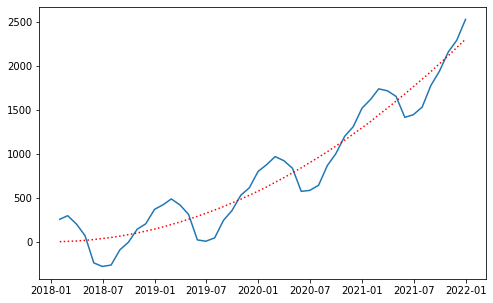

In [7]:
df = ts_generate(beta=np.array([1, 2, 1]), alpha=np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])*100,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I, 'r:' )

plt.show()

,t,Y,T,S,R,I
2018-01-31,0,1.99,1,0.0,0.99,0.0
2018-02-28,1,1.93,3,0.0,-1.07,0.0
2018-03-31,2,3.64,5,0.0,-1.36,0.0
2018-04-30,3,7.26,7,0.0,0.26,0.0
2018-05-31,4,10.10,9,0.0,1.10,0.0


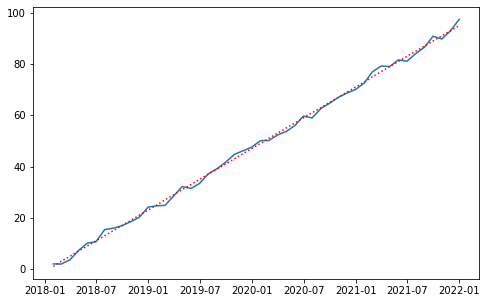

In [8]:
df = ts_generate(beta=np.array([1, 2]), alpha=np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])*0,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I, 'r:' )
plt.show()

,t,Y,T,S,R,I
2018-01-31,0,-3.77,1,-11.67,6.91,0.0
2018-02-28,1,1.70,4,5.16,-7.46,0.0
2018-03-31,2,3.98,7,6.51,-9.53,0.0
2018-04-30,3,0.15,10,-11.67,1.82,0.0
2018-05-31,4,25.87,13,5.16,7.71,0.0


,t,Y,T,S,R,I
2018-01-31,0,6.53,1,-1.37,6.91,0.0
2018-02-28,1,28.83,4,32.29,-7.46,0.0
2018-03-31,2,32.47,7,35.00,-9.53,0.0
2018-04-30,3,16.10,10,4.27,1.82,0.0
2018-05-31,4,-10.93,13,-31.64,7.71,0.0


,t,Y,T,S,R,I
2018-01-31,0,65.55,1,57.64,6.91,0.0
2018-02-28,1,26.60,4,30.06,-7.46,0.0
2018-03-31,2,-29.86,7,-27.33,-9.53,0.0
2018-04-30,3,-49.93,10,-61.76,1.82,0.0
2018-05-31,4,-20.87,13,-41.58,7.71,0.0


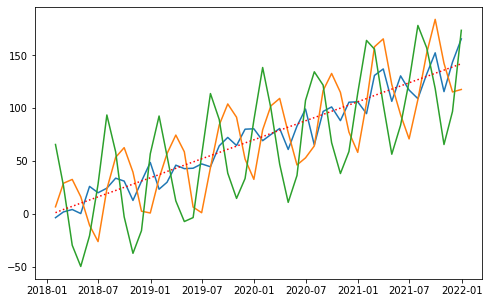

,t,Y,T,S,R,I
count,48.00,48.000000,48.00,4.800000e+01,4.800000e+01,48.0
mean,23.50,71.500000,71.50,1.776357e-15,5.921189e-16,0.0
std,14.00,44.226987,42.00,8.359295e+00,8.372093e+00,0.0
min,0.00,-3.766576,1.00,-1.167179e+01,-1.538248e+01,0.0
25%,11.75,32.960489,36.25,-1.167179e+01,-6.217288e+00,0.0
50%,23.50,70.694753,71.50,5.157630e+00,-1.379885e+00,0.0
75%,35.25,105.685885,106.75,6.514159e+00,6.599678e+00,0.0
max,47.00,165.537544,142.00,6.514159e+00,1.702338e+01,0.0


In [9]:
df = ts_generate(beta=np.array([1, 3]), alpha=np.sin( np.arange(0,3) )*20,r_scale=35,verbose=True)
df2 = ts_generate(beta=np.array([1, 3]), alpha=np.sin( np.arange(0,12) )*40,r_scale=35,verbose=True)
df3 = ts_generate(beta=np.array([1, 3]), alpha=np.cos( np.arange(0,6) )*60,r_scale=35,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df2.Y )
plt.plot( df3.Y )
plt.plot( df['T'] + df.I, 'r:' ) 
plt.show()

df.describe()

,t,Y,T,S,R,I
2018-01-31,0,-4.77,0,-11.67,6.91,0.0
2018-02-28,1,-2.30,0,5.16,-7.46,0.0
2018-03-31,2,-3.02,0,6.51,-9.53,0.0
2018-04-30,3,-9.85,0,-11.67,1.82,0.0
2018-05-31,4,12.87,0,5.16,7.71,0.0


,t,Y,T,S,R,I
2018-01-31,0,5.53,0,-1.37,6.91,0.0
2018-02-28,1,24.83,0,32.29,-7.46,0.0
2018-03-31,2,25.47,0,35.00,-9.53,0.0
2018-04-30,3,6.10,0,4.27,1.82,0.0
2018-05-31,4,-23.93,0,-31.64,7.71,0.0


,t,Y,T,S,R,I
2018-01-31,0,64.55,0,57.64,6.91,0.0
2018-02-28,1,22.60,0,30.06,-7.46,0.0
2018-03-31,2,-36.86,0,-27.33,-9.53,0.0
2018-04-30,3,-59.93,0,-61.76,1.82,0.0
2018-05-31,4,-33.87,0,-41.58,7.71,0.0


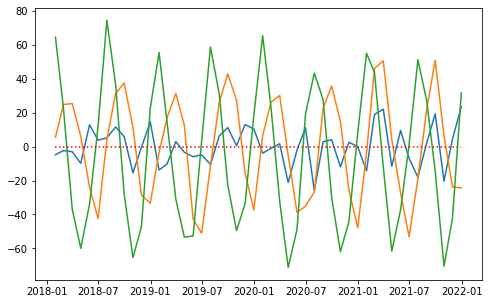

,t,Y,T,S,R,I
count,48.00,4.800000e+01,48.0,4.800000e+01,4.800000e+01,48.0
mean,23.50,2.072416e-15,0.0,1.776357e-15,5.921189e-16,0.0
std,14.00,1.162093e+01,0.0,8.359295e+00,8.372093e+00,0.0
min,0.00,-2.591932e+01,0.0,-1.167179e+01,-1.538248e+01,0.0
25%,11.75,-7.644549e+00,0.0,-1.167179e+01,-6.217288e+00,0.0
50%,23.50,2.796047e-01,0.0,5.157630e+00,-1.379885e+00,0.0
75%,35.25,7.106485e+00,0.0,6.514159e+00,6.599678e+00,0.0
max,47.00,2.353754e+01,0.0,6.514159e+00,1.702338e+01,0.0


In [10]:
df = ts_generate(beta=np.array([0]), alpha=np.sin( np.arange(0,3) )*20,r_scale=35,verbose=True)
df2 = ts_generate(beta=np.array([0]), alpha=np.sin( np.arange(0,12) )*40,r_scale=35,verbose=True)
df3 = ts_generate(beta=np.array([0]), alpha=np.cos( np.arange(0,6) )*60,r_scale=35,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df2.Y )
plt.plot( df3.Y )
plt.plot( df['T'] + df.I, 'r:' ) 
plt.show()

df.describe()

,t,Y,T,S,R,I
2018-01-31,0,-4.77,0,-11.67,6.91,0.0
2018-02-28,1,-2.30,0,5.16,-7.46,0.0
2018-03-31,2,-3.02,0,6.51,-9.53,0.0
2018-04-30,3,-9.85,0,-11.67,1.82,0.0
2018-05-31,4,12.87,0,5.16,7.71,0.0


,t,Y,T,S,R,I
2018-01-31,0,5.53,0,-1.37,6.91,0.0
2018-02-28,1,24.83,0,32.29,-7.46,0.0
2018-03-31,2,25.47,0,35.00,-9.53,0.0
2018-04-30,3,6.10,0,4.27,1.82,0.0
2018-05-31,4,-23.93,0,-31.64,7.71,0.0


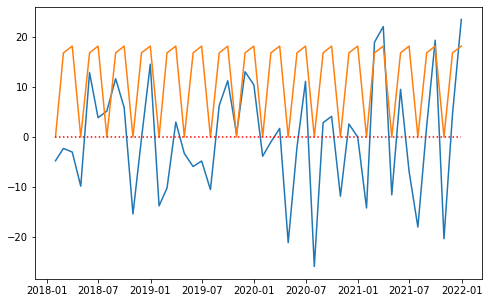

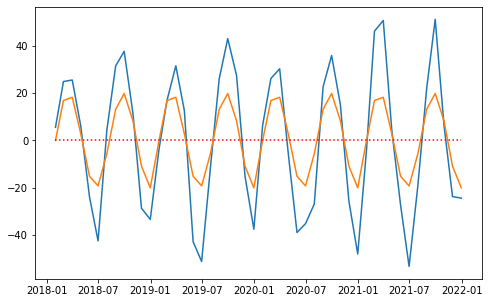

,t,Y,T,S,R,I
count,48.00,4.800000e+01,48.0,4.800000e+01,4.800000e+01,48.0
mean,23.50,2.072416e-15,0.0,1.776357e-15,5.921189e-16,0.0
std,14.00,1.162093e+01,0.0,8.359295e+00,8.372093e+00,0.0
min,0.00,-2.591932e+01,0.0,-1.167179e+01,-1.538248e+01,0.0
25%,11.75,-7.644549e+00,0.0,-1.167179e+01,-6.217288e+00,0.0
50%,23.50,2.796047e-01,0.0,5.157630e+00,-1.379885e+00,0.0
75%,35.25,7.106485e+00,0.0,6.514159e+00,6.599678e+00,0.0
max,47.00,2.353754e+01,0.0,6.514159e+00,1.702338e+01,0.0


In [11]:
df = ts_generate(beta=np.array([0]), alpha=np.sin( np.arange(0,3) )*20,r_scale=35,verbose=True)
df2 = ts_generate(beta=np.array([0]), alpha=np.sin( np.arange(0,12) )*40,r_scale=35,verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df.index, np.sin( np.arange(0,len(df.index) ) % 3 )*20 )
plt.plot( df['T'] + df.I, 'r:' ) 
plt.show()

plt.figure(figsize=(8,5))

plt.plot( df2.Y )
plt.plot( df.index, np.sin( np.arange(0,len(df.index) ) % 12 )*20 )
plt.plot( df['T'] + df.I, 'r:' ) 
plt.show()

df.describe()

In [12]:
df = ts_generate(beta=np.array([1, 2]), alpha=np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])*3,verbose=True)


import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "scatter"},
           {"type": "table"}]]
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df.Y,
        mode="lines",
        name="Y Value"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['Date'] + list(df.columns),
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[pd.to_datetime(df.index,'YY-MM-DD')] + [df.apply(lambda x: np.round(x, 2))[k].tolist() for k in df.columns[0:]],
            font=dict(size=8),
            align = "left")
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1000,
    showlegend=False,
    title_text="Y values",
)

fig.show()

,t,Y,T,S,R,I
2018-01-31,0,9.59,1,7.6,0.99,0.0
2018-02-28,1,10.73,3,8.8,-1.07,0.0
2018-03-31,2,9.44,5,5.8,-1.36,0.0
2018-04-30,3,8.86,7,1.6,0.26,0.0
2018-05-31,4,2.10,9,-8.0,1.10,0.0


In [13]:
import statsmodels.formula.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import periodogram


In [14]:
#@markdown **plot_series()** Decomposição de Séries Temporais + ACF + PACF
def plot_series(values, decomp_type='additive', max_lags=30, df=None):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline 
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  # from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type)

  ax[0].plot(decomposition.trend)
  if df is not None:
    ax[0].plot(decomposition.trend.index, df['T'] + df['I'],'r:')
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  if df is not None:
    ax[1].plot(decomposition.trend.index, df['S'],'r:')
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  if df is not None:
    ax[2].plot(decomposition.trend.index, df['R'],'r:')
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

#  rcParams['figure.figsize'] = 14,3
#  fig, ax = plt.subplots(nrows=1, ncols=3)

#  plot_acf(values, ax=ax[0], lags = max_lags)
#  plot_pacf(values, ax=ax[1], lags = max_lags)


  # periods = periodogram(values)
  # # print(periods)
  # ax[2].bar(x=range(len(periods)), height=periods)
  # plt.title('Periodogram')

#  plt.tight_layout()
#  plt.show()

  warnings.filterwarnings('once')

  return 




,t,Y,T,S,R,I
2018-01-31,0,9.59,1,7.6,0.99,0.0
2018-02-28,1,10.73,3,8.8,-1.07,0.0
2018-03-31,2,9.44,5,5.8,-1.36,0.0
2018-04-30,3,8.86,7,1.6,0.26,0.0
2018-05-31,4,2.10,9,-8.0,1.10,0.0


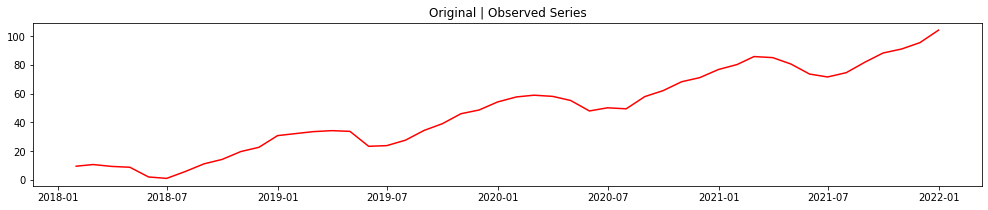

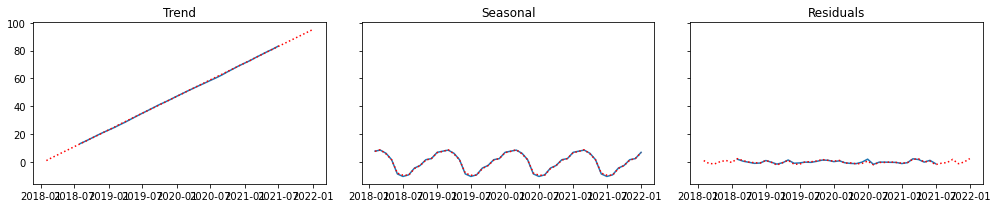

In [15]:
df = ts_generate(beta=np.array([1, 2]), alpha=np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])*3,verbose=True)

plot_series(df.Y,df=df)  

In [16]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Y ~ t', data=df)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     773.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.05e-30
Time:                        16:11:12   Log-Likelihood:                -159.30
No. Observations:                  48   AIC:                             322.6
Df Residuals:                      46   BIC:                             326.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5005      1.941      0.773      0.4

In [17]:
df['T_hat'] = model.predict(df.t)

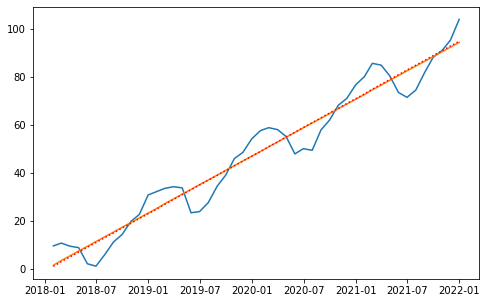

In [18]:
plt.figure(figsize=(8,5))
    
plt.plot( df['Y'] )
plt.plot( df.index, df['T_hat'] )
plt.plot( df['T'] + df.I, 'r:' )
plt.show()

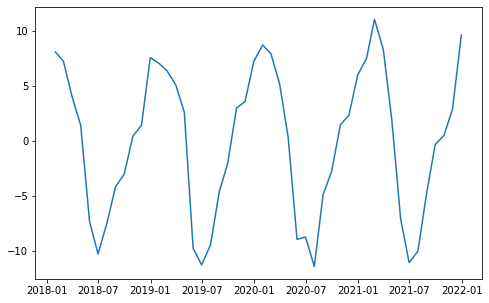

In [19]:
df['Y-T_hat'] = df['Y'] - df['T_hat']

plt.figure(figsize=(8,5))
    
plt.plot( df['Y-T_hat'] )
plt.show()

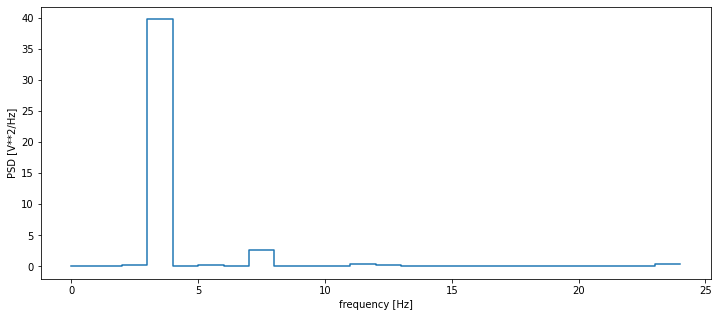

In [20]:
from scipy import signal

fig, ax = plt.subplots( figsize=(12,5))
frequencies, spectrum = signal.periodogram(df['Y-T_hat'],fs=48) 

# the same can be done here:
# frequencies, spectrum = signal.periodogram(df['Y'],fs=48,detrend='linear') 

ax.step(frequencies, spectrum)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [21]:
dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum  
dfft['periods'] = len(df) / dfft['frequencies']
dfft.sort_values('spectrum',ascending=False).head()

,frequencies,spectrum,periods
4,4.0,39.743119,12.0
8,8.0,2.672672,6.0
12,12.0,0.423075,4.0
24,24.0,0.402790,2.0
6,6.0,0.260476,8.0


In [22]:
list(np.round(np.arange(1,frequencies.max()) ** (-1) * 48, 1))

[48.0,
 24.0,
 16.0,
 12.0,
 9.6,
 8.0,
 6.9,
 6.0,
 5.3,
 4.8,
 4.4,
 4.0,
 3.7,
 3.4,
 3.2,
 3.0,
 2.8,
 2.7,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1]

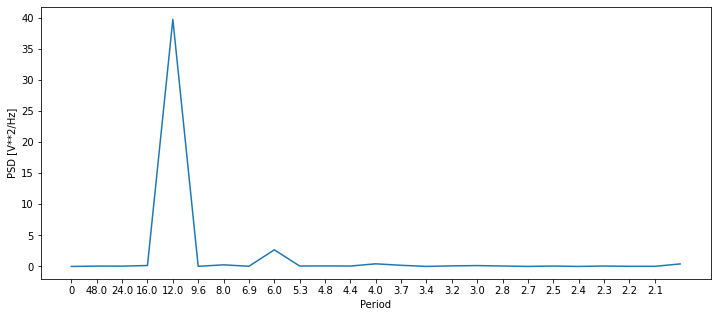

In [23]:
from scipy import signal

fig, ax = plt.subplots( figsize=(12,5))
frequencies, spectrum = signal.periodogram(df['Y'],fs=48,detrend='linear') 

# ax.step(frequencies, spectrum)
ax.plot(frequencies, spectrum)

ax.set_xticks(np.arange(0,frequencies.max()))
ax.set_xticklabels([0] + list(np.round(np.arange(1,frequencies.max()) ** (-1) * len(df),1)))

plt.xlabel('Period')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

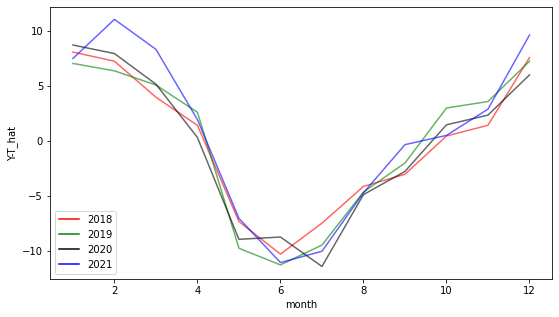

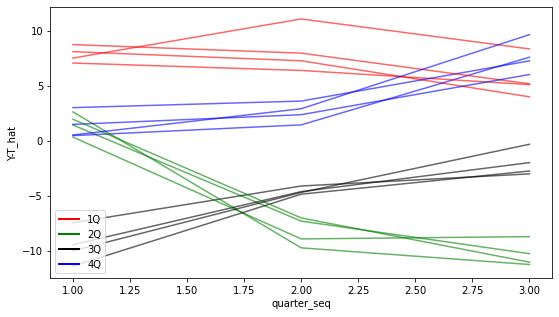

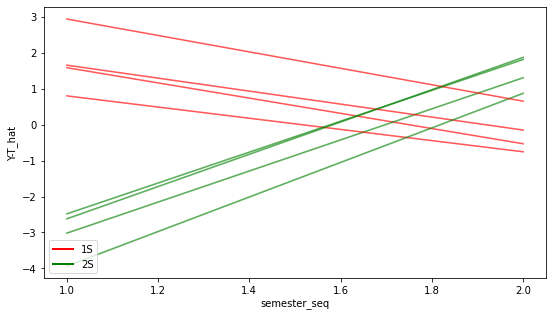

In [24]:
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['quarter_seq'] = [ ( x % 3 if x % 3 != 0 else 3 ) for x in df['month'] ]

df['semester'] = 1 + (df.index.month > 6)
df['semester_seq'] = [ ( x % 2 if x % 2 != 0 else 2 ) for x in df['month'] ]

df['day'] = df.index.dayofweek  # the x-axis (freq)
# df['week'] = df.index.week  # the seasonal period (period)

df['dayofyear'] = df.index.dayofyear

from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(9,5))  
ax = sns.lineplot(x='month',y='Y-T_hat',hue='year',data=df,ci=False,ax=ax,legend=True,palette=['r', 'g', 'k', 'b'],alpha  = 0.6)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 
for year in df['year'].unique():
  ax = sns.lineplot(x='quarter_seq',y='Y-T_hat',hue='quarter',data=df[ df.year == year ],ci=False,ax=ax,legend=False,palette=['r', 'g', 'k', 'b'],alpha  = 0.6)
  custom_lines = [Line2D([0], [0], color='r', lw=2),
                  Line2D([0], [0], color='g', lw=2),
                  Line2D([0], [0], color='k', lw=2),
                  Line2D([0], [0], color='b', lw=2)]

  ax.legend(custom_lines, ['1Q', '2Q', '3Q', '4Q'],loc='lower left')
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 
for year in df['year'].unique():
  ax = sns.lineplot(x='semester_seq',y='Y-T_hat',hue='semester',data=df[ df.year == year ],ci=False,ax=ax,legend=False,palette=['r', 'g'],alpha  = 0.6)
  custom_lines = [Line2D([0], [0], color='r', lw=2),
                  Line2D([0], [0], color='g', lw=2)]

  ax.legend(custom_lines, ['1S', '2S'],loc='lower left')
plt.show()

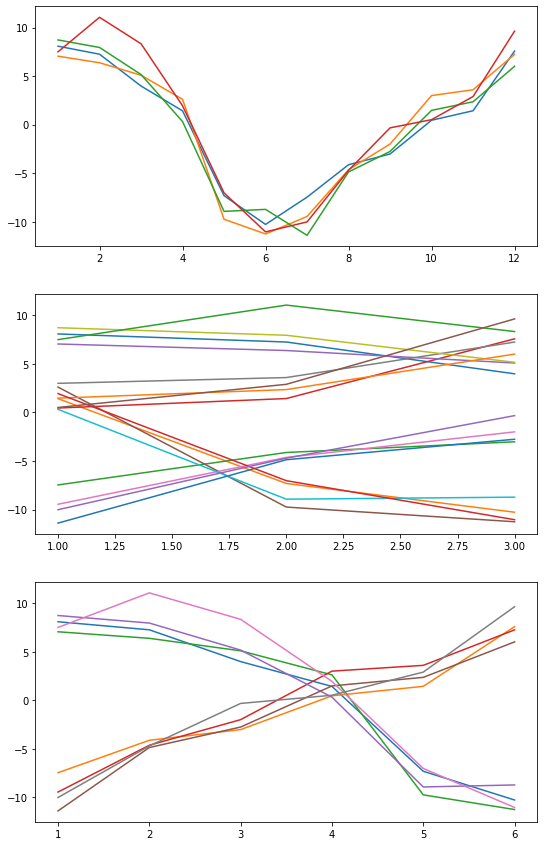

In [25]:
plt.figure(figsize=(9,3*5))

i = 1

# for period in ['year','quarter','semester']:
plt.subplot(3,1,1)
period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['Y-T_hat'])

plt.subplot(3,1,2)
period = 'quarter'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['Y-T_hat'])

plt.subplot(3,1,3)
period = 'semester'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['Y-T_hat'])

plt.show()

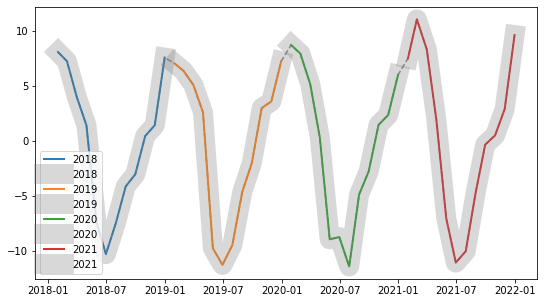

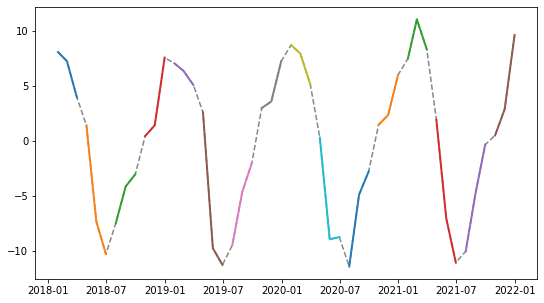

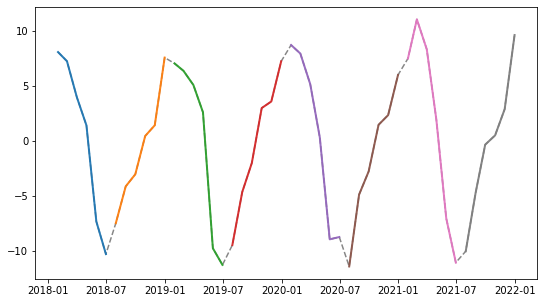

In [26]:
fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax.plot(df[ df['year'] == year ].index,df[ df['year'] == year ]['Y-T_hat'],alpha  = 0.95,label=year,lw=2)
  ax.plot(df[ df['year'] == year ].index,df[ df['year'] == year ]['Y-T_hat'],alpha  = 0.3,label=year,lw=20,color='grey')

plt.legend(loc='lower left')
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y-T_hat'],alpha  =  0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  for quarter in df['quarter'].unique():
    ax.plot(df[ (df['year'] == year) & (df['quarter'] == quarter) ].index,df[ (df['year'] == year) & (df['quarter'] == quarter) ]['Y-T_hat'],alpha  = 0.95,lw=2)

# plt.legend(loc='lower left')
plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y-T_hat'],alpha  =  0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  for semester in df['semester'].unique():
    ax.plot(df[ (df['year'] == year) & (df['semester'] == semester) ].index,df[ (df['year'] == year) & (df['semester'] == semester) ]['Y-T_hat'],alpha  = 0.95,lw=2)

# plt.legend(loc='lower left')
plt.show()

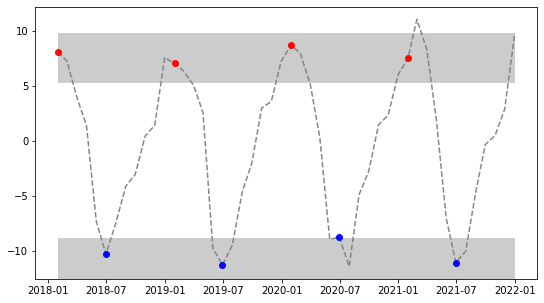

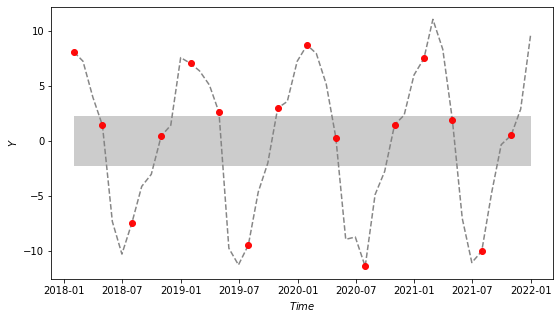

In [27]:
fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax.plot(df[ (df['year'] == year) & (df['month'] == 1) ].index,df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
  ax.plot(df[ (df['year'] == year) & (df['month'] == 6) ].index,df[ (df['year'] == year) & (df['month'] == 6) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax.hlines(df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
ax.hlines(df[ (df['year'] == year) & (df['month'] == 6) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

plt.show()

fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax.plot(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ].index,df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
#   ax.plot(df[ (df['year'] == year) & (df['quarter'] == 3) ].index,df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax.hlines(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
# ax.hlines(df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

In [28]:
df.groupby('month')['Y-T_hat'].mean() 

month
1      7.841765
2      8.160975
3      5.643123
4      1.575129
5     -8.253300
6    -10.325095
7     -9.583105
8     -4.582458
9     -2.027009
10     1.360771
11     2.570580
12     7.618624
Name: Y-T_hat, dtype: float64

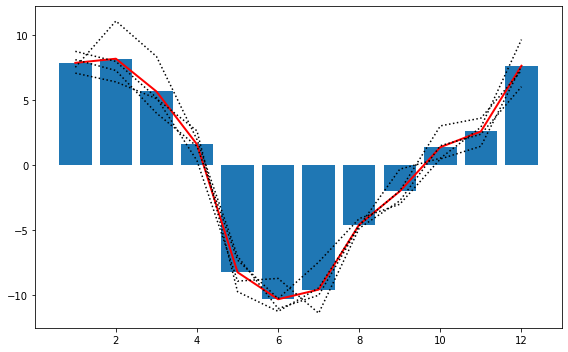

In [29]:
plt.figure(figsize=(8,5))
    
plt.bar(x=df.groupby('month')['Y-T_hat'].mean().index,height=df.groupby('month')['Y-T_hat'].mean().values)
plt.plot(df.groupby('month')['Y-T_hat'].mean().index,df.groupby('month')['Y-T_hat'].mean().values,color='r',lw=2)

period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['Y-T_hat'],'k:')

plt.tight_layout()
plt.show()

In [30]:
df_S_hat = pd.DataFrame( df.groupby('month')['Y-T_hat'].mean() ).reset_index()
df_S_hat.rename(columns = {'Y-T_hat':'S_hat'},inplace=True)
df_S_hat

,month,S_hat
0,1,7.841765
1,2,8.160975
2,3,5.643123
3,4,1.575129
4,5,-8.253300
5,6,-10.325095
6,7,-9.583105
7,8,-4.582458
8,9,-2.027009
9,10,1.360771


In [31]:
df = df.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df.index.name = ''
df.head()

,t,Y,T,S,R,I,T_hat,Y-T_hat,month,year,quarter,quarter_seq,semester,semester_seq,day,dayofyear,S_hat
,,,,,,,,,,,,,,,,,
2018-01-31,0,9.586459,1,7.6,0.986459,0.0,1.500521,8.085938,1,2018,1,1,1,1,2,31,7.841765
2018-02-28,1,10.734810,3,8.8,-1.065190,0.0,3.479222,7.255588,2,2018,1,2,1,2,2,59,8.160975
2018-03-31,2,9.438370,5,5.8,-1.361630,0.0,5.457923,3.980447,3,2018,1,3,1,1,5,90,5.643123
2018-04-30,3,8.860687,7,1.6,0.260687,0.0,7.436625,1.424062,4,2018,2,1,1,2,0,120,1.575129
2018-05-31,4,2.101458,9,-8.0,1.101458,0.0,9.415326,-7.313868,5,2018,2,2,1,1,3,151,-8.253300


In [32]:
df['Y_hat'] = df['T_hat'] + df['S_hat']


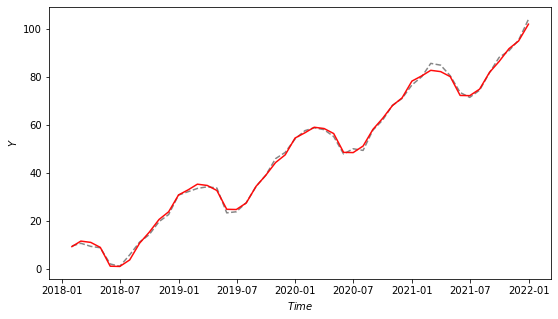

In [33]:
fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df.index,df['Y_hat'],alpha  = 0.95, color='red' )

plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

In [34]:
# calculate manually
r = df['Y'] - df['Y_hat']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 0.8955873759388068
MSE: 1.304191364090783
RMSE: 1.1420119807124542


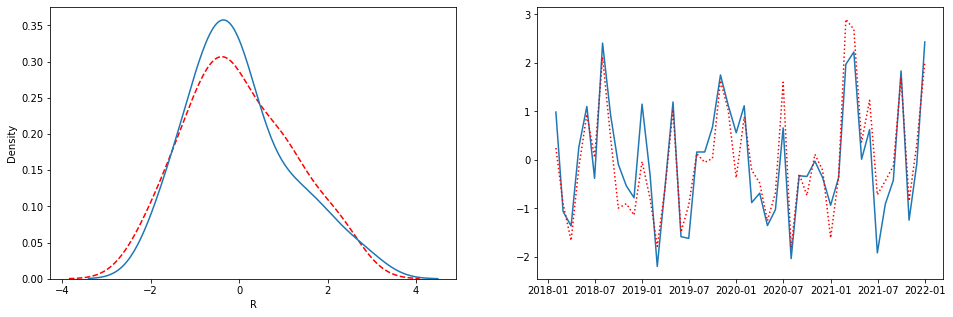

In [35]:
df['r'] = r

fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(16,5))
    
sns.kdeplot(df['R'], ax=ax1, color='red', linestyle='dashed') 
sns.kdeplot(df['r'], ax=ax1)

ax2.plot( df.index, df['R'] )
ax2.plot( df.index, df['r'], 'r:' )

plt.show()


In [36]:
np.random.seed(123)
start='12/1/2021'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(df.t.max(),df.t.max()+len(index_dates),1) # atenção ao df.t.max()

df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

T_hat = model.predict( df_forecast['t'] ) 
df_forecast['T_hat'] = T_hat

df_forecast['month'] = df_forecast.index.month
df_forecast = df_forecast.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df_forecast.index.name = ''

df_forecast['Y_hat'] = df_forecast['T_hat'] + df_forecast['S_hat']
df_forecast.head()


,t,T_hat,month,S_hat,Y_hat
,,,,,
2021-12-31,47,94.499479,12,7.618624,102.118103
2022-01-31,48,96.478180,1,7.841765,104.319945
2022-02-28,49,98.456881,2,8.160975,106.617857
2022-03-31,50,100.435583,3,5.643123,106.078706
2022-04-30,51,102.414284,4,1.575129,103.989413


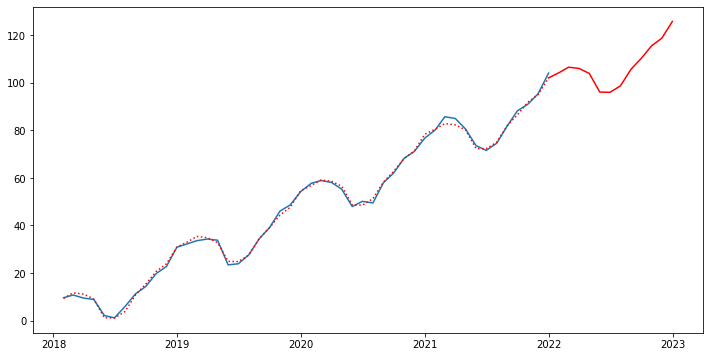

In [37]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['Y'] )
plt.plot( df.index, df['Y_hat'],'r:' )

plt.plot( df_forecast.index, df_forecast['Y_hat'],'r' )
plt.show()

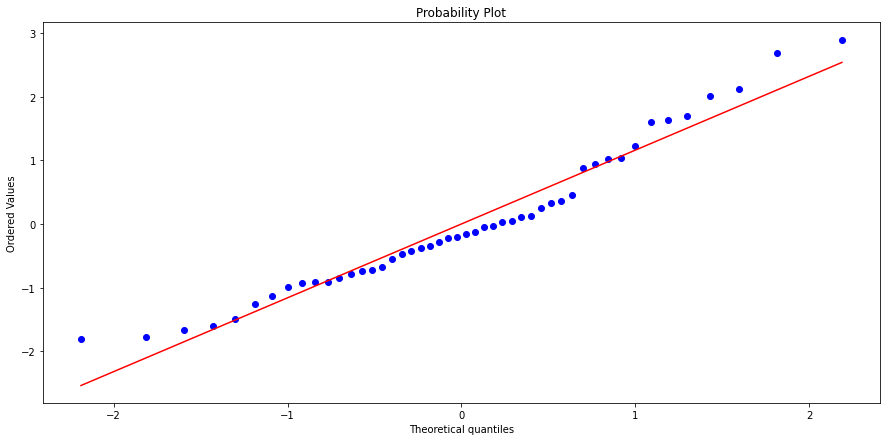

In [38]:
# https://towardsdatascience.com/time-series-forecasting-prediction-intervals-360b1bf4b085

from scipy import stats

plt.figure(figsize=(15,7))
res = stats.probplot(df['r'], plot=plt)

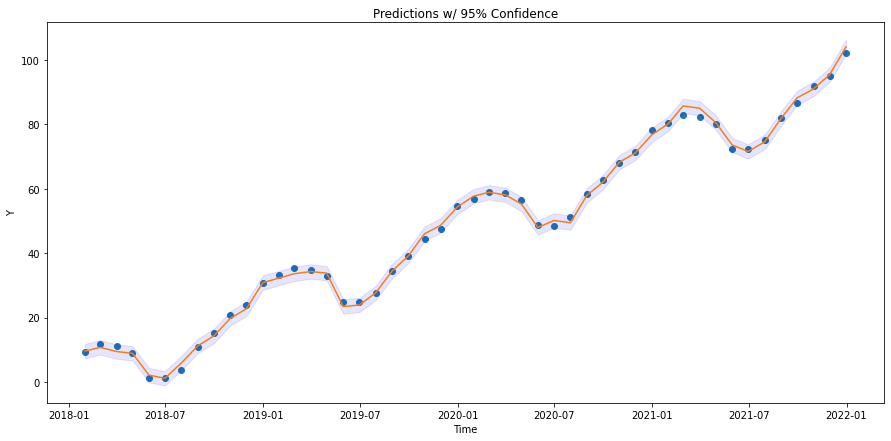

In [39]:
RMSFE = np.sqrt(sum([x**2 for x in df['r']]) / len(df['r']))
band_size = 1.96*RMSFE

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.index, df['Y'], color='#fc7d0b', label='Valid')
ax.scatter(df.index, df['Y_hat'])
ax.fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)
ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.show()

In [40]:
df_forecast['step'] = np.arange(1,len(df_forecast)+1)

df_forecast['band_size'] = df_forecast['step'] * band_size 



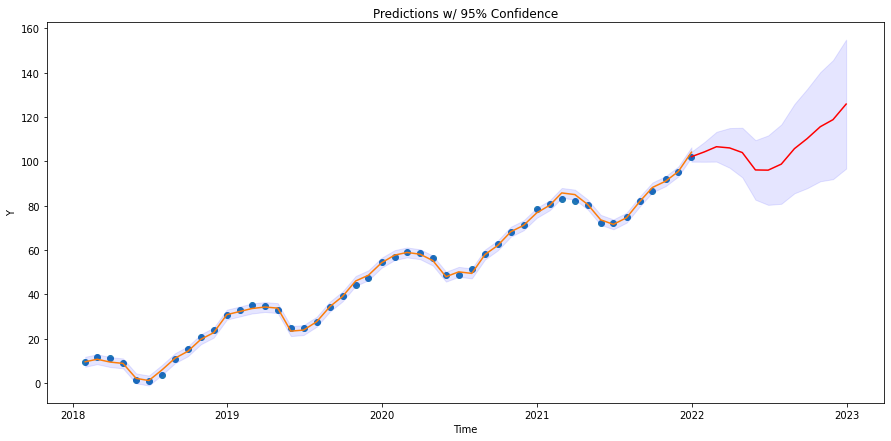

In [41]:
# naive forecast from... 
# https://otexts.com/fpp2/prediction-intervals.html

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df.index, df['Y'], color='#fc7d0b', label='Valid')
ax.scatter(df.index, df['Y_hat'])
ax.fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

plt.plot( df_forecast.index, df_forecast['Y_hat'],'r' )
ax.fill_between(df_forecast.index, (df_forecast['Y_hat']-df_forecast['band_size']), (df_forecast['Y_hat']+df_forecast['band_size']), color='b', alpha=.1)

ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.show()

In [42]:
df['Y_t-1'] = df['Y'].diff() 

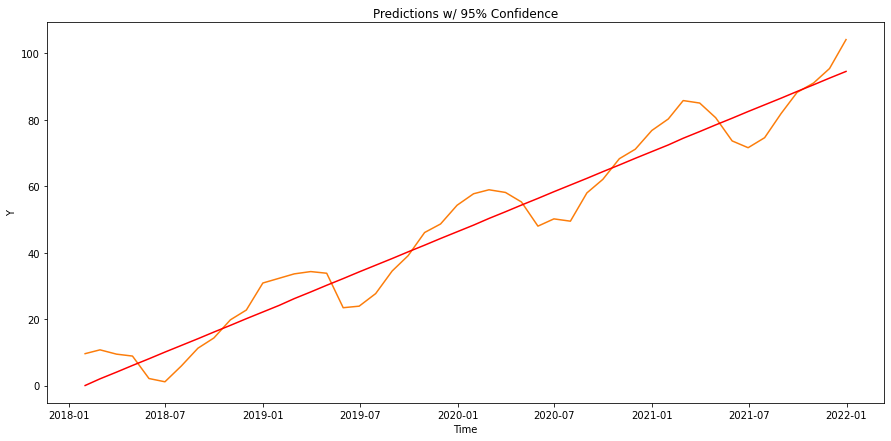

In [43]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df.index, df['Y'], color='#fc7d0b', label='Valid')
plt.plot(df.index, df.t * df['Y_t-1'].mean() ,'r' )

ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.show()

In [44]:
df['T_hat_lag'] = df.t * df['Y_t-1'].mean()

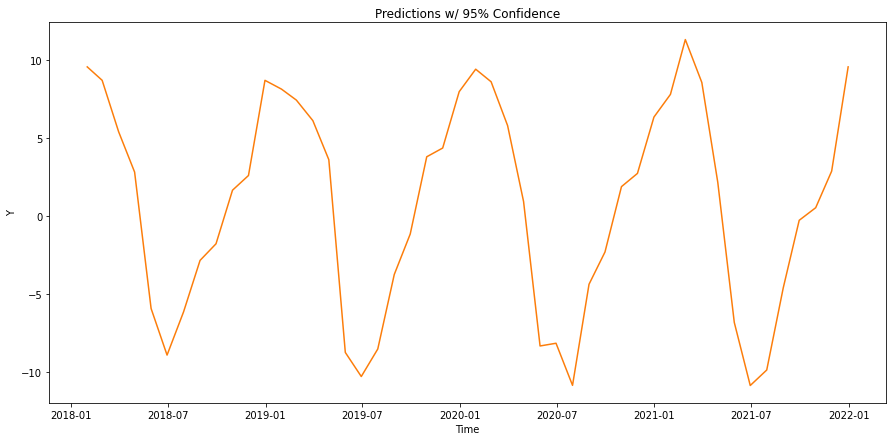

In [45]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df.index, df['Y'] - df['T_hat_lag'], color='#fc7d0b', label='Valid')

ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.show()

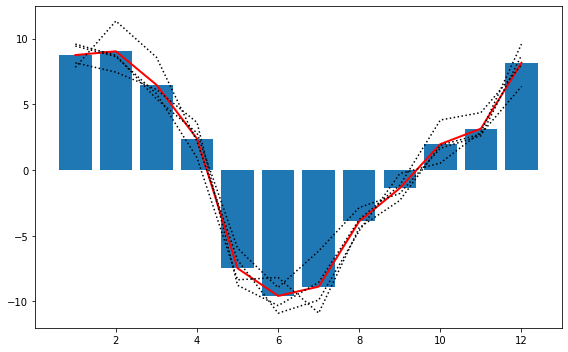

In [46]:
df['Y-T_hat_lag'] = df['Y'] - df['T_hat_lag']

plt.figure(figsize=(8,5))
    
plt.bar(x=df.groupby('month')['Y-T_hat_lag'].mean().index,height=df.groupby('month')['Y-T_hat_lag'].mean().values)
plt.plot(df.groupby('month')['Y-T_hat_lag'].mean().index,df.groupby('month')['Y-T_hat_lag'].mean().values,color='r',lw=2)

period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['Y-T_hat_lag'],'k:')

plt.tight_layout()
plt.show()

In [47]:
df_S_hat_lag = pd.DataFrame( df.groupby('month')['Y-T_hat_lag'].mean() ).reset_index()
df_S_hat_lag.rename(columns = {'Y-T_hat_lag':'S_hat_lag'},inplace=True)
df_S_hat_lag

,month,S_hat_lag
0,1,8.750011
1,2,9.036318
2,3,6.485561
3,4,2.384663
4,5,-7.476671
5,6,-9.581370
6,7,-8.872284
7,8,-3.904541
8,9,-1.381996
9,10,1.972880


In [48]:
df.index.name = 'index'
df = df.reset_index().merge(df_S_hat_lag, on='month').sort_values('index').set_index('index')
df.index.name = ''
df.head()

,t,Y,T,S,R,I,T_hat,Y-T_hat,month,year,...,semester_seq,day,dayofyear,S_hat,Y_hat,r,Y_t-1,T_hat_lag,Y-T_hat_lag,S_hat_lag
,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0,9.586459,1,7.6,0.986459,0.0,1.500521,8.085938,1,2018,...,1,2,31,7.841765,9.342286,0.244173,NaN,0.000000,9.586459,8.750011
2018-02-28,1,10.734810,3,8.8,-1.065190,0.0,3.479222,7.255588,2,2018,...,2,2,59,8.160975,11.640198,-0.905388,1.148351,2.011605,8.723204,9.036318
2018-03-31,2,9.438370,5,5.8,-1.361630,0.0,5.457923,3.980447,3,2018,...,1,5,90,5.643123,11.101046,-1.662676,-1.296439,4.023211,5.415160,6.485561
2018-04-30,3,8.860687,7,1.6,0.260687,0.0,7.436625,1.424062,4,2018,...,2,0,120,1.575129,9.011754,-0.151067,-0.577683,6.034816,2.825871,2.384663
2018-05-31,4,2.101458,9,-8.0,1.101458,0.0,9.415326,-7.313868,5,2018,...,1,3,151,-8.253300,1.162026,0.939432,-6.759229,8.046422,-5.944964,-7.476671


In [49]:
df['Y_hat_lag'] = df['T_hat_lag'] + df['S_hat_lag']


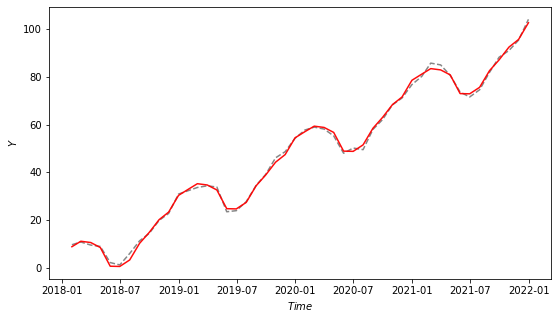

In [50]:
fig, ax = plt.subplots(figsize=(9,5)) 

ax.plot(df.index,df['Y'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df.index,df['Y_hat_lag'],alpha  = 0.95, color='red' )

plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

In [51]:
# calculate manually
r = df['Y'] - df['Y_hat_lag']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 0.9342214870323845
MSE: 1.2550331601924833
RMSE: 1.120282625140854


In [52]:
np.random.seed(123)
start='12/1/2021'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(df.t.max(),df.t.max()+len(index_dates),1) # atenção ao df.t.max()

df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

T_hat = model.predict( df_forecast['t'] ) 
df_forecast['T_hat_lag'] = df_forecast.t * df['Y_t-1'].mean()

df_forecast['month'] = df_forecast.index.month
df_forecast = df_forecast.reset_index().merge(df_S_hat_lag, on='month').sort_values('index').set_index('index')
df_forecast.index.name = ''

df_forecast['Y_hat'] = df_forecast['T_hat_lag'] + df_forecast['S_hat_lag']
df_forecast.head() 

,t,T_hat_lag,month,S_hat_lag,Y_hat
,,,,,
2021-12-31,47,94.545453,12,8.164925,102.710378
2022-01-31,48,96.557058,1,8.750011,105.307070
2022-02-28,49,98.568664,2,9.036318,107.604981
2022-03-31,50,100.580269,3,6.485561,107.065830
2022-04-30,51,102.591875,4,2.384663,104.976537


In [53]:
df_forecast['step'] = np.arange(1,len(df_forecast)+1)

df_forecast['band_size'] = df_forecast['step'] * band_size 

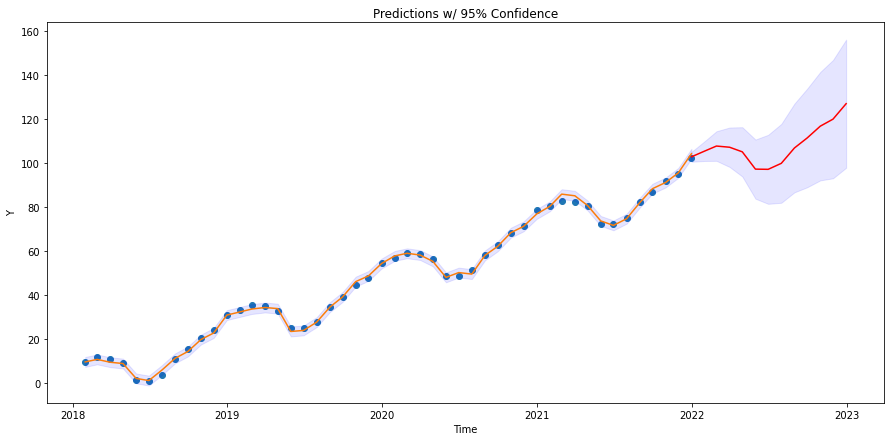

In [54]:
# naive forecast from... 
# https://otexts.com/fpp2/prediction-intervals.html

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df.index, df['Y'], color='#fc7d0b', label='Valid')
ax.scatter(df.index, df['Y_hat'])
ax.fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

plt.plot( df_forecast.index, df_forecast['Y_hat'],'r' )
ax.fill_between(df_forecast.index, (df_forecast['Y_hat']-df_forecast['band_size']), (df_forecast['Y_hat']+df_forecast['band_size']), color='b', alpha=.1)

ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Time')
ax.set_ylabel('Y')
plt.show()

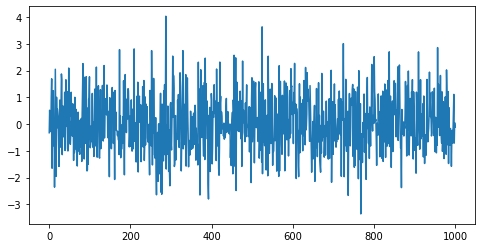

In [64]:
from statsmodels.tsa.arima_process import ArmaProcess

plt.figure(figsize=(8,4))
ar1 = np.array([10,0.5])
ma1 = np.array([10])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

plt.show()
